# Covid-19

In [1]:
from __future__ import absolute_import
from __future__ import print_function

import os
import sys
import optparse
import subprocess
import random

import numpy as np

import sqlite3

import csv

import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import decomposition

import pygraphviz

from networkx.algorithms import community

from mpl_toolkits.mplot3d import Axes3D

In [2]:
conn = sqlite3.connect('database.db')
conn.text_factory = str
c = conn.cursor()

In [3]:
c.execute("DROP TABLE IF EXISTS basic_information")
conn.commit()
c.execute('''CREATE TABLE basic_information(
 PID int,
 AGE integer
)''')

c.execute("CREATE INDEX basicinfo_pid on basic_information (PID)")

In [4]:
files = ["data/dataset.csv"]
for filename in files:
   with open(filename, mode='r') as csv_file:
         csv_reader = csv.DictReader(csv_file)
         for row in csv_reader:
            c.execute("SELECT PID FROM basic_information WHERE PID = '" +row["Patient ID"] + "'")
            if c.fetchone() == None:
               c.execute("INSERT INTO basic_information(PID, AGE) VALUES(?, ?)", (row["Patient ID"], row["Patient age quantile"]))
conn.commit()

In [5]:
pd.read_sql_query("SELECT * FROM basic_information", conn)

,PID,AGE
0,44477f75e8169d2,13
1,126e9dd13932f68,17
2,a46b4402a0e5696,8
3,f7d619a94f97c45,5
4,d9e41465789c2b5,15
...,...,...
5635,ae66feb9e4dc3a0,3
5636,517c2834024f3ea,17
5637,5c57d6037fe266d,4
5638,c20c44766f28291,10


In [6]:
c.execute("DROP TABLE IF EXISTS exams")
conn.commit()
c.execute('''CREATE TABLE exams(
    PID int, 
    SARSCov2 text,
    Hematocrit text,
    Hemoglobin text,
    Platelets text,
    mean_platelet_volume text, 
    red_blood_cells text,
    lymphocytes text,
    mean_corpuscular_hemoglobin_concentration text,
    leukocytes text,
    basophils text,
    mean_corpuscular_hemoglobi text,
    eosinophils text,
    mean_corpuscular_volume text,
    monocytes text,
    red_blood_cell_distribution text,
    serum_glucose text,
    respiratory_syncytial_virus text,
    influenza_aa text,
    influenza_bb text,
    parainfluenza_1 text,
    coronavirusNL63 text,
    rhinovirus text,
    mycoplasma_pneumoniae text,
    coronavirus_HKU1 text,
    parainfluenza_3 text,
    chlamydophila_pneumoniae text,
    adenovirus text,
    parainfluenza_4 text,
    coronavirus229E text,
    coronavirusOC43 text,
    inf_A_H1N1_2009 text,
    bordetella_pertussis text,
    metapneumovirus text,
    parainfluenza_2 text,
    neutrophils text,
    urea text,
    proteina_C_reativa text,
    creatinine text,
    potassium text,
    sodium text,
    influenza_B text,
    influenza_A text,
    alanine_transaminase text,
    aspartate_transaminase text,
    gamma_glutamyltransferase text,
    total_bilirubin text,
    direct_bilirubin text,
    indirect_bilirubin text,
    alkaline_phosphatase text,
    ionized_calcium text,
    strepto_A text,
    magnesium text,
    pCO2_v text,
    Hb_saturation_v text,
    base_excess_v text,
    pO2_v text,
    Fio2 text,
    total CO2 text,
    pH text,
    HCO3_v text,
    Rods text,
    Segmented text,
    Promyelocytes text,
    Metamyelocytes text,
    Myelocytes text,
    Myeloblasts text,
    Urine_Esterase text,
    Urine_Aspect text,
    Urine_pH text,
    Urine_Hemoglobin text,
    Urine_Bile_pigments text,
    Urine_Ketone_Bodies text,
    Urine_Nitrite text,
    Urine_Density text,
    Urine_Urobilinogen text,
    Urine_Protein text,
    Urine_Sugar text,
    Urine_Leukocytes text,
    Urine_Crystals text,
    Urine_Red_blood_cells text,
    Urine_Hyaline_cylinders text,
    Urine_Granular_cylinders text,
    Urine_Yeasts text,
    Urine_Color text,
    Partial_thromboplastin text,
    Relationship text,
    International text,
    Lactic_Dehydrogenase text,
    Prothrombin_time text,
    Vitamin_B12 text,
    Creatine_phosphokinase text,
    Ferritin text,
    Arterial_Lactic_Acid text,
    Lipase_dosage text,
    D_Dimer text,
    Albumin text,
    Hb_saturation text,
    pCO2 text,
    Base_excess text,
    pH_arterial_blood text,
    total_CO2 text,
    HCO3 text,
    pO2 text,
    Arteiral_Fio2 text,
    Phosphor text,
    ctO2 text
  
)''')

c.execute("CREATE INDEX pid_exam on exams (PID)")

In [7]:
files = ["data/dataset.csv"]
for filename in files:
    with open(filename, mode='r') as csv_file:
          csv_reader = csv.DictReader(csv_file)
          for row in csv_reader:
             c.execute("SELECT PID FROM exams WHERE PID  = '" +row["Patient ID"] + "'")
             if c.fetchone() == None:
                c.execute("INSERT INTO exams(PID, SARSCov2, Hematocrit, Hemoglobin, Platelets, mean_platelet_volume, red_blood_cells, lymphocytes, mean_corpuscular_hemoglobin_concentration, leukocytes, basophils,mean_corpuscular_hemoglobi, eosinophils, mean_corpuscular_volume, monocytes, red_blood_cell_distribution, serum_glucose, respiratory_syncytial_virus, influenza_aa, influenza_bb, parainfluenza_1, coronavirusNL63, rhinovirus, mycoplasma_pneumoniae, coronavirus_HKU1, parainfluenza_3, chlamydophila_pneumoniae, adenovirus, parainfluenza_4, coronavirus229E, coronavirusOC43, inf_A_H1N1_2009, bordetella_pertussis, metapneumovirus, parainfluenza_2, neutrophils, urea, proteina_C_reativa, creatinine, potassium, sodium, influenza_B, influenza_A, alanine_transaminase, aspartate_transaminase,gamma_glutamyltransferase, total_bilirubin, direct_bilirubin, indirect_bilirubin, alkaline_phosphatase, ionized_calcium, strepto_A, magnesium, pCO2_v, Hb_saturation_v, base_excess_v, pO2_v, Fio2, total_CO2, pH, HCO3_v, Rods, Segmented, Promyelocytes, Metamyelocytes, Myelocytes, Myeloblasts, Urine_Esterase, Urine_Aspect, Urine_pH, Urine_Hemoglobin, Urine_Bile_pigments, Urine_Ketone_Bodies, Urine_Nitrite, Urine_Density, Urine_Urobilinogen, Urine_Protein, Urine_Sugar, Urine_Leukocytes, Urine_Crystals, Urine_Red_blood_cells, Urine_Hyaline_cylinders, Urine_Granular_cylinders, Urine_Yeasts, Urine_Color, Partial_thromboplastin, Relationship, International, Lactic_Dehydrogenase, Prothrombin_time, Vitamin_B12, Creatine_phosphokinase, Ferritin, Arterial_Lactic_Acid, Lipase_dosage, D_Dimer, Albumin, Hb_saturation,pCO2,Base_excess,pH_arterial_blood,total_CO2,HCO3,pO2,Arteiral_Fio2,Phosphor,ctO2) VALUES(?, ?, ?, ?,?,?, ?, ?, ?,?,?, ?, ?, ?,?,?, ?, ?, ?,?,?, ?, ?, ?,?,?, ?, ?, ?,?,?, ?, ?, ?,?,?, ?, ?, ?,?,?, ?, ?, ?,?,?, ?, ?, ?,?,?, ?, ?, ?,?,?, ?, ?, ?,?,?, ?, ?, ?,?,?, ?, ?, ?,?,?, ?, ?, ?,?,?, ?, ?, ?,?,?, ?, ?, ?,?,?, ?, ?, ?,?,?, ?, ?, ?,?,?, ?, ?, ?,?,?, ?, ?, ?,?,?, ?)", 
                          (row["Patient ID"],
                           row["SARS-Cov-2 exam result"],
                            row["Hematocrit"],
                            row["Hemoglobin"],
                            row["Platelets"],
                            row["Mean platelet volume "],
                            row["Red blood Cells"],
                            row["Lymphocytes"],
                            row["Mean corpuscular hemoglobin concentration (MCHC)"],
                            row["Leukocytes"],
                            row["Basophils"],
                            row["Mean corpuscular hemoglobin (MCH)"],
                            row["Eosinophils"],
                            row["Mean corpuscular volume (MCV)"],
                            row["Monocytes"],
                            row["Red blood cell distribution width (RDW)"],
                            row["Serum Glucose"],
                            row["Respiratory Syncytial Virus"],
                            row["Influenza A"],
                            row["Influenza B"],
                            row["Parainfluenza 1"],
                            row["CoronavirusNL63"],
                            row["Rhinovirus/Enterovirus"],
                            row["Mycoplasma pneumoniae"],
                            row["Coronavirus HKU1"],
                            row["Parainfluenza 3"],
                            row["Chlamydophila pneumoniae"],
                            row["Adenovirus"],
                            row["Parainfluenza 4"],
                            row["Coronavirus229E"],
                            row["CoronavirusOC43"],
                            row["Inf A H1N1 2009"],
                            row["Bordetella pertussis"],
                            row["Metapneumovirus"],
                            row["Parainfluenza 2"],
                            row["Neutrophils"],
                            row["Urea"],
                            row["Proteina C reativa mg/dL"],
                            row["Creatinine"],
                            row["Potassium"],
                            row["Sodium"],
                            row["Influenza B, rapid test"],
                            row["Influenza A, rapid test"],
                            row["Alanine transaminase"],
                            row["Aspartate transaminase"],
                            row["Gamma-glutamyltransferase "],
                            row["Total Bilirubin"],
                            row["Direct Bilirubin"],
                            row["Indirect Bilirubin"],
                            row["Alkaline phosphatase"],
                            row["Ionized calcium "],
                            row["Strepto A"],
                            row["Magnesium"],
                            row["pCO2 (venous blood gas analysis)"],
                            row["Hb saturation (venous blood gas analysis)"],
                            row["Base excess (venous blood gas analysis)"],
                            row["pO2 (venous blood gas analysis)"],
                            row["Fio2 (venous blood gas analysis)"],
                            row["Total CO2 (venous blood gas analysis)"],
                            row["pH (venous blood gas analysis)"],
                            row["HCO3 (venous blood gas analysis)"],
                            row["Rods #"],
                            row["Segmented"],
                            row["Promyelocytes"],
                            row["Metamyelocytes"],
                            row["Myelocytes"],
                            row["Myeloblasts"],
                            row["Urine - Esterase"],
                            row["Urine - Aspect"],
                            row["Urine - pH"],
                            row["Urine - Hemoglobin"],
                            row["Urine - Bile pigments"],
                            row["Urine - Ketone Bodies"],
                            row["Urine - Nitrite"],
                            row["Urine - Density"],
                            row["Urine - Urobilinogen"],
                            row["Urine - Protein"],
                            row["Urine - Sugar"],
                            row["Urine - Leukocytes"],
                            row["Urine - Crystals"],
                            row["Urine - Red blood cells"],
                            row["Urine - Hyaline cylinders"],
                            row["Urine - Granular cylinders"],
                            row["Urine - Yeasts"],
                            row["Urine - Color"],
                            row["Partial thromboplastin time (PTT) "],
                            row["Relationship (Patient/Normal)"],
                            row["International normalized ratio (INR)"],
                            row["Lactic Dehydrogenase"],
                            row["Prothrombin time (PT), Activity"],
                            row["Vitamin B12"],
                            row["Creatine phosphokinase (CPK) "],
                            row["Ferritin"],
                            row["Arterial Lactic Acid"],
                            row["Lipase dosage"],
                            row["D-Dimer"],
                            row["Albumin"],
                            row["Hb saturation (arterial blood gases)"],
                            row["pCO2 (arterial blood gas analysis)"],
                            row["Base excess (arterial blood gas analysis)"],
                            row["pH (arterial blood gas analysis)"],
                            row["Total CO2 (arterial blood gas analysis)"],
                            row["HCO3 (arterial blood gas analysis)"],
                            row["pO2 (arterial blood gas analysis)"],
                            row["Arteiral Fio2"],
                            row["Phosphor"],
                            row["ctO2 (arterial blood gas analysis)"]
                          ))
conn.commit()

In [8]:
pd.read_sql_query("SELECT * FROM exams WHERE SARSCov2='positive'", conn)

,PID,SARSCov2,Hematocrit,Hemoglobin,Platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration,leukocytes,...,Hb_saturation,pCO2,Base_excess,pH_arterial_blood,total_CO2,HCO3,pO2,Arteiral_Fio2,Phosphor,ctO2
0,78511c183ae18bc,positive,,,,,,,,,...,,,,,,,,,,
1,d7834ed75f2da44,positive,,,,,,,,,...,,,,,,,,,,
2,b16b49f7bd3e692,positive,,,,,,,,,...,,,,,,,,,,
3,4382f5ea05e60c4,positive,0.991838216781616,0.792187631130219,-0.341547667980194,1.46918761730194,1.65347576141357,-0.048383265733719,-0.452899485826492,-0.420197039842606,...,,,,,-0.479346334934235,,,,,
4,d3729cd2658ca64,positive,,,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,5c386388ba3c3f0,positive,,,,,,,,,...,,,,,,,,,,
552,9f8dfe2ae239238,positive,,,,,,,,,...,,,,,,,,,,
553,db77903261ab6d0,positive,,,,,,,,,...,,,,,,,,,,
554,ae66feb9e4dc3a0,positive,,,,,,,,,...,,,,,,,,,,


In [9]:
c.execute("DROP VIEW IF EXISTS positive_cases")
conn.commit()
c.execute('''CREATE VIEW positive_cases AS SELECT * FROM exams WHERE SARSCov2='positive' ''')

In [10]:
c.execute("DROP TABLE IF EXISTS treatments")
conn.commit()
c.execute('''CREATE TABLE treatments(
    PID int, 
    regular text,
    semi_intensive text,
    intensive text
  
)''')

c.execute("CREATE INDEX pid_treatment on treatments (PID)")

In [11]:
files = ["data/dataset.csv"]
for filename in files:
    with open(filename, mode='r') as csv_file:
          csv_reader = csv.DictReader(csv_file)
          for row in csv_reader:
             c.execute("SELECT PID FROM treatments WHERE PID  = '" +row["Patient ID"] + "'")
             if c.fetchone() == None:
                c.execute("INSERT INTO treatments(PID,regular,semi_intensive,intensive) VALUES(?, ?, ?, ?)", 
                          (row["Patient ID"], 
                           row["Patient addmited to regular ward (1=yes, 0=no)"], 
                           row["Patient addmited to semi-intensive unit (1=yes, 0=no)"],
                           row["Patient addmited to intensive care unit (1=yes, 0=no)"]
                          ))
conn.commit()

In [12]:
pd.read_sql_query("SELECT * FROM treatments NATURAL JOIN positive_cases AS e WHERE e.SARSCov2='positive'", conn)

,PID,regular,semi_intensive,intensive,SARSCov2,Hematocrit,Hemoglobin,Platelets,mean_platelet_volume,red_blood_cells,...,Hb_saturation,pCO2,Base_excess,pH_arterial_blood,total_CO2,HCO3,pO2,Arteiral_Fio2,Phosphor,ctO2
0,78511c183ae18bc,0,0,0,positive,,,,,,...,,,,,,,,,,
1,d7834ed75f2da44,1,0,0,positive,,,,,,...,,,,,,,,,,
2,b16b49f7bd3e692,0,0,0,positive,,,,,,...,,,,,,,,,,
3,4382f5ea05e60c4,0,0,0,positive,0.991838216781616,0.792187631130219,-0.341547667980194,1.46918761730194,1.65347576141357,...,,,,,-0.479346334934235,,,,,
4,d3729cd2658ca64,0,0,0,positive,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,5c386388ba3c3f0,0,0,0,positive,,,,,,...,,,,,,,,,,
552,9f8dfe2ae239238,0,0,0,positive,,,,,,...,,,,,,,,,,
553,db77903261ab6d0,0,0,0,positive,,,,,,...,,,,,,,,,,
554,ae66feb9e4dc3a0,0,0,0,positive,,,,,,...,,,,,,,,,,


In [13]:
pd.read_sql_query("SELECT * FROM treatments t NATURAL JOIN positive_cases AS e WHERE t.intensive='1'", conn)

,PID,regular,semi_intensive,intensive,SARSCov2,Hematocrit,Hemoglobin,Platelets,mean_platelet_volume,red_blood_cells,...,Hb_saturation,pCO2,Base_excess,pH_arterial_blood,total_CO2,HCO3,pO2,Arteiral_Fio2,Phosphor,ctO2
0,66342a96fc1f90b,0,0,1,positive,1.3122786283493,1.60671555995941,-1.68566119670868,1.24480140209198,1.54769372940064,...,,,,,,,,,,
1,e453b3d4bd51d0d,0,0,1,positive,0.144960805773735,0.165627807378769,-0.41691854596138,-0.325903296470642,0.47224172949791,...,,,,,,,,,,
2,30bfb33927acb18,0,0,1,positive,0.396735638380051,0.666875779628754,-0.366671293973923,-0.550289511680603,0.207786232233048,...,,,,,,,,,,
3,680d440c979e1f1,0,0,1,positive,1.60982990264893,1.73202800750732,-0.693278312683106,-0.662483155727387,1.60058438777924,...,,,,,,,,,,
4,c68a37fa5820769,0,0,1,positive,-0.358587980270386,-0.147652119398117,0.273980975151062,0.122869148850441,-0.12719064950943,...,,,,,0.196209013462067,,,,,
5,e4170692991ff53,0,0,1,positive,-1.15968799591065,-1.08749186992645,0.512655377388001,-1.89660906791687,-0.479797452688217,...,,,,,-1.49267888069153,,,,,
6,d584d2cf7d09e1e,0,0,1,positive,-0.450141757726669,0.040315955877304,-0.492289394140243,-0.77467679977417,-0.409276098012924,...,0.695567190647125,-0.23052167892456,0.745927393436432,0.451139718294144,,0.220760077238083,0.263685673475265,-0.011743661947548,,0.182692795991898
7,482a960eb07d3cd,0,0,1,positive,-0.427253544330597,-0.210307747125626,-1.2711216211319,-0.325903296470642,-0.374015420675278,...,1.29448544979096,-0.138313010334969,0.666164875030518,0.342490613460541,0.994592487812042,0.549617230892181,2.0876932144165,-1.47512817382813,,0.182692795991898


In [14]:
pd.read_sql_query("SELECT * FROM treatments t NATURAL JOIN positive_cases AS e WHERE t.regular='1'", conn)

,PID,regular,semi_intensive,intensive,SARSCov2,Hematocrit,Hemoglobin,Platelets,mean_platelet_volume,red_blood_cells,...,Hb_saturation,pCO2,Base_excess,pH_arterial_blood,total_CO2,HCO3,pO2,Arteiral_Fio2,Phosphor,ctO2
0,d7834ed75f2da44,1,0,0,positive,,,,,,...,,,,,,,,,,
1,ab9745da9d139b9,1,0,0,positive,-0.495919108390808,-0.398275822401047,-0.718401968479157,-0.438096940517426,-0.567949593067169,...,,,,,,,,,,
2,1e7e33688edc5a9,1,0,0,positive,,,,,,...,,,,,,,,,,
3,3fc734fd9bafbd6,1,0,0,positive,,,,,,...,,,,,,,,,,
4,ff34f2c79fc6cf0,1,0,0,positive,,,,,,...,,,,,,,,,,
5,a665e33ec22b37d,1,0,0,positive,,,,,,...,,,,,,,,,,
6,5ea443e2ac871d0,1,0,0,positive,,,,,,...,,,,,,,,,,
7,b3b0594e8259848,1,0,0,positive,0.648509562015534,0.478907734155655,-0.79377281665802,-0.662483155727387,0.719066500663757,...,,,,,,,,,,
8,ee224510b31f15c,1,0,0,positive,,,,,,...,,,,,,,,,,
9,1fb83a73999bcab,1,0,0,positive,-0.106813162565231,-0.272963970899582,-0.894267320632935,0.796028912067413,-0.338754743337631,...,,,,,,,,,,


# PCA

In [15]:
from sklearn.impute import SimpleImputer

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
db = pd.read_csv('data/dataset.csv')
df = db

db = db.replace('not_detected', 0)
db = db.replace('detected', 1)
db = db.replace('negative', 0)
db = db.replace('positive', 1)
db = db.replace('not_done', 0)
db = db.replace('done', 1)
db = db.replace('absent',0)
db = db.replace('clear', 0)
db = db.replace('altered_coloring', 1)
db = db.replace('normal', 0)
db = db.replace('cloudy', 1)
db = db.replace('lightly_cloudy', 0.5)
db = db.replace('Não Realizado', 0)
db = db.replace('present', 1)
db = db.replace('<1000', 0)
db = db.replace('Ausentes', 0)
db = db.replace('Urato Amorfo --+', 0.5)
db = db.replace('Urato Amorfo +++', 1)
db = db.replace('Oxalato de Cálcio +++', 1)
db = db.replace('Oxalato de Cálcio -++', 0.5)
db = db.replace('light_yellow', 0.5)
db = db.replace('yellow', 0.7)
db = db.replace('orange', 1)
db = db.replace('citrus_yellow', 0.8)

# print(db.where(db=='not_detected'))

feature_names = list(db.iloc[:,3:111])
# print(feature_names)

y = db['SARS-Cov-2 exam result']
# print(y)
samples = db.drop(columns=['SARS-Cov-2 exam result', 'Patient ID', 'Patient age quantile'])

imp = SimpleImputer(strategy='mean')
X = imp.fit_transform(samples.values)

# print(X)

# print(y)

print(db.groupby('SARS-Cov-2 exam result').size())

SARS-Cov-2 exam result
0    5086
1     558
dtype: int64


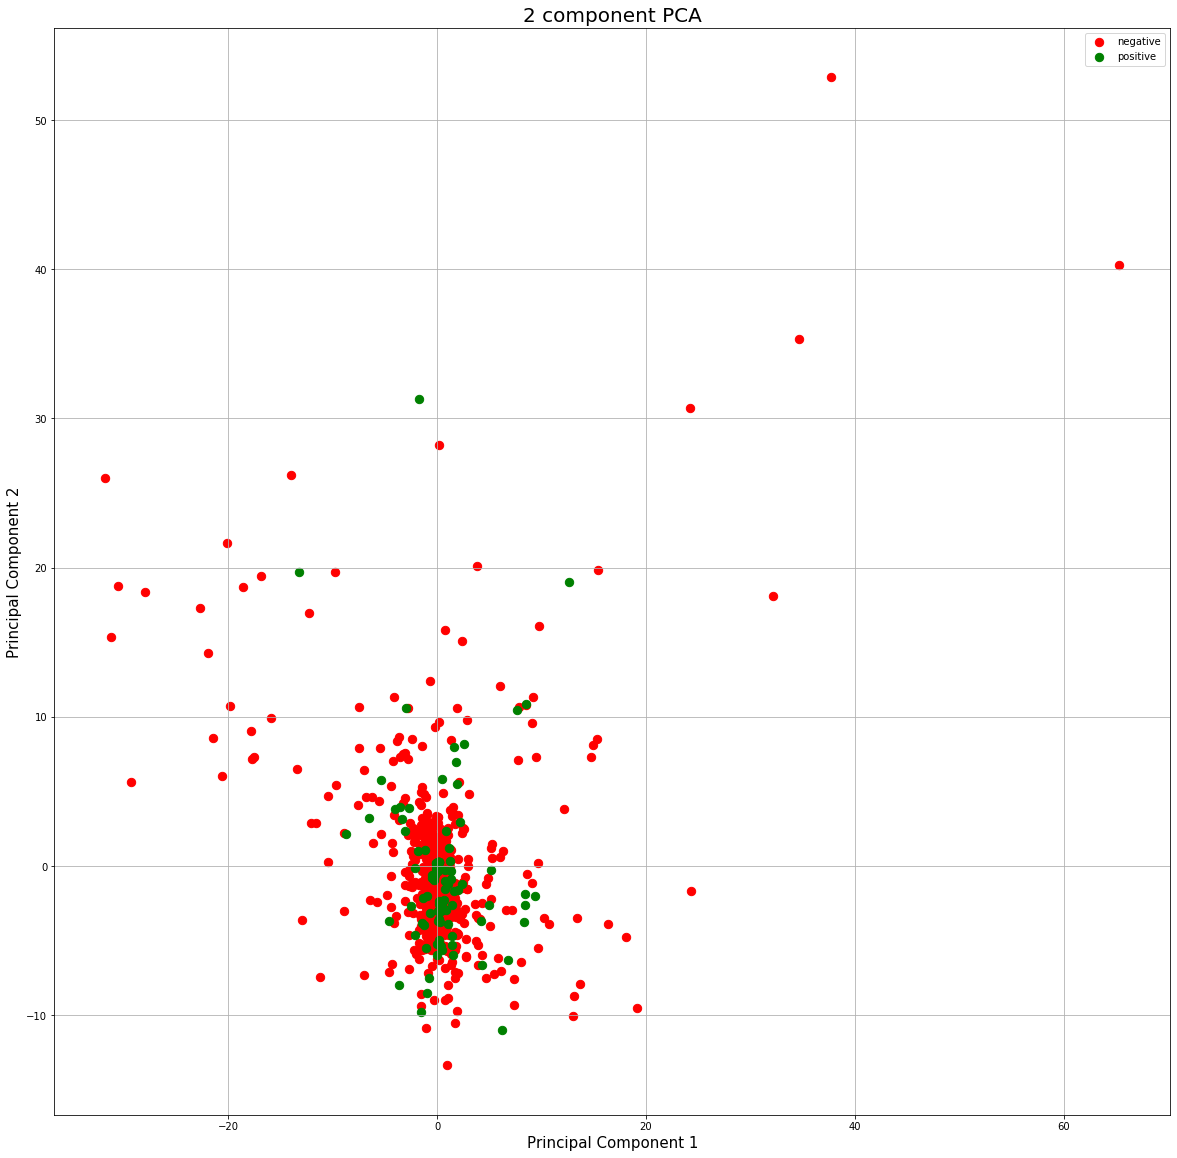

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['SARS-Cov-2 exam result']]], axis = 1)

# print(finalDf)
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['negative', 'positive']
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['SARS-Cov-2 exam result'] == target
#     print(finalDf.loc[indicesToKeep, 'principal component 1'])
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 70)
ax.legend(targets)
ax.grid()

In [17]:
categories = {
  "infections": [
    'Patient age quantile',
    'SARS-Cov-2 exam result',
    'Patient addmited to regular ward (1=yes, 0=no)',
    'Patient addmited to semi-intensive unit (1=yes, 0=no)',
    'Patient addmited to intensive care unit (1=yes, 0=no)',
    'Respiratory Syncytial Virus',
    'Influenza A',
    'Influenza B',
    'Parainfluenza 1',
    'CoronavirusNL63',
    'Rhinovirus/Enterovirus',
    'Coronavirus HKU1',
    'Parainfluenza 3',
    'Chlamydophila pneumoniae',
    'Adenovirus',
    'Parainfluenza 4',
    'Coronavirus229E',
    'CoronavirusOC43',
    'Inf A H1N1 2009',
    'Bordetella pertussis',
    'Metapneumovirus',
    'Parainfluenza 2',
    'Influenza B, rapid test',
    'Influenza A, rapid test',
    'Strepto A'
  ],
  "blood": [
    'Patient age quantile',
    'SARS-Cov-2 exam result',
    'Patient addmited to regular ward (1=yes, 0=no)',
    'Patient addmited to semi-intensive unit (1=yes, 0=no)',
    'Patient addmited to intensive care unit (1=yes, 0=no)',
    'Hematocrit',
    'Hemoglobin',
    'Platelets',
    'Mean platelet volume ',
    'Red blood Cells',
    'Lymphocytes',
    'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
    'Leukocytes',
    'Basophils',
    'Mean corpuscular hemoglobin (MCH)',
    'Eosinophils',
    'Mean corpuscular volume (MCV)',
    'Monocytes',
    'Red blood cell distribution width (RDW)',
    'Serum Glucose',
    'Neutrophils',
    'Urea',
    'Proteina C reativa mg/dL',
    'Creatinine',
    'Alanine transaminase',
    'Aspartate transaminase',
    'Gamma-glutamyltransferase\xa0',
    'Total Bilirubin',
    'Direct Bilirubin',
    'Indirect Bilirubin',
    'Lactic Dehydrogenase',
    'Creatine phosphokinase\xa0(CPK)\xa0',
    'Arterial Lactic Acid',
    'Lipase dosage',
    'Albumin',
    'Arteiral Fio2'
  ],
  "mineravit": [
    'Patient age quantile',
    'SARS-Cov-2 exam result',
    'Patient addmited to regular ward (1=yes, 0=no)',
    'Patient addmited to semi-intensive unit (1=yes, 0=no)',
    'Patient addmited to intensive care unit (1=yes, 0=no)',
    'Potassium',
    'Sodium',
    'Alkaline phosphatase',
    'Ionized calcium\xa0',
    'Magnesium',
    'Vitamin B12',
    'Ferritin',
    'Phosphor'
  ],
  "urine": [
    'Patient age quantile',
    'SARS-Cov-2 exam result',
    'Patient addmited to regular ward (1=yes, 0=no)',
    'Patient addmited to semi-intensive unit (1=yes, 0=no)',
    'Patient addmited to intensive care unit (1=yes, 0=no)',
    'Urine - Esterase',
    'Urine - Aspect',
    'Urine - pH',
    'Urine - Hemoglobin',
    'Urine - Bile pigments',
    'Urine - Ketone Bodies',
    'Urine - Nitrite',
    'Urine - Density',
    'Urine - Urobilinogen',
    'Urine - Protein',
    'Urine - Leukocytes',
    'Urine - Crystals',
    'Urine - Red blood cells',
    'Urine - Hyaline cylinders',
    'Urine - Granular cylinders',
    'Urine - Yeasts',
    'Urine - Color'
  ],
  "gas_analysis": [
    'Patient age quantile',
    'SARS-Cov-2 exam result',
    'Patient addmited to regular ward (1=yes, 0=no)',
    'Patient addmited to semi-intensive unit (1=yes, 0=no)',
    'Patient addmited to intensive care unit (1=yes, 0=no)',
    'pCO2 (venous blood gas analysis)',
    'Hb saturation (venous blood gas analysis)',
    'Base excess (venous blood gas analysis)',
    'pO2 (venous blood gas analysis)',
    'Fio2 (venous blood gas analysis)',
    'Total CO2 (venous blood gas analysis)',
    'pH (venous blood gas analysis)',
    'HCO3 (venous blood gas analysis)',
    'Hb saturation (arterial blood gases)',
    'pCO2 (arterial blood gas analysis)',
    'Base excess (arterial blood gas analysis)',
    'pH (arterial blood gas analysis)',
    'Total CO2 (arterial blood gas analysis)',
    'HCO3 (arterial blood gas analysis)',
    'pO2 (arterial blood gas analysis)',
    'ctO2 (arterial blood gas analysis)'
  ],
  "cancer": [
    'Patient age quantile',
    'SARS-Cov-2 exam result',
    'Patient addmited to regular ward (1=yes, 0=no)',
    'Patient addmited to semi-intensive unit (1=yes, 0=no)',
    'Patient addmited to intensive care unit (1=yes, 0=no)',
    'Promyelocytes',
    'Metamyelocytes',
    'Myelocytes',
    'Myeloblasts'
  ]
}

In [18]:
dataset = pd.read_csv('data/dataset.csv')
db_infections = dataset[categories["infections"]]
db_infections.replace([np.nan, 'NaN', "negative", "not_detected"], 0, inplace=True)
db_infections.replace(["positive", "detected"], 1, inplace=True)

print(db_infections)

      Patient age quantile  SARS-Cov-2 exam result  \
0                       13                       0   
1                       17                       0   
2                        8                       0   
3                        5                       0   
4                       15                       0   
...                    ...                     ...   
5639                     3                       1   
5640                    17                       0   
5641                     4                       0   
5642                    10                       0   
5643                    19                       1   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...            

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [19]:
positive_infections = db_infections[db_infections['SARS-Cov-2 exam result'] == 1]

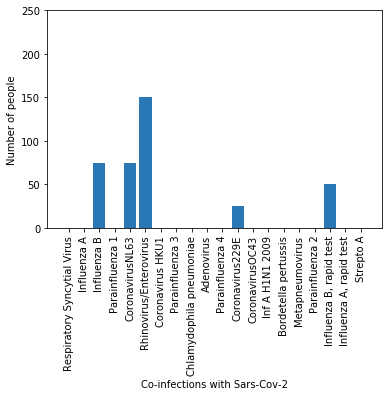

In [20]:
columns = positive_infections.columns
to_remove = ['Patient age quantile', 'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'SARS-Cov-2 exam result']
for col in to_remove:
    columns = np.delete(columns, np.where(columns == col))

x = []
y = []

for col in columns:
    l = positive_infections[positive_infections[col] == 1]
    x.append(col)
    y.append(l.size)

y_pos = np.arange(len(y))
 
plt.bar(y_pos, y, color = '#2977b4')
plt.xlabel('Co-infections with Sars-Cov-2')
plt.ylabel('Number of people')

plt.ylim(0,max(y)+100)
plt.xticks(y_pos, x, rotation=90)
 
plt.show()

In [21]:
db_blood = dataset[categories["blood"]].replace([np.nan, 'NaN'], 0)

      Hematocrit  Hemoglobin  Platelets  Mean platelet volume   \
PC-1   -0.309192   -0.316544   0.044228              -0.041642   
PC-2    0.339282    0.367678  -0.152760               0.110741   

      Red blood Cells  Lymphocytes  \
PC-1        -0.253589    -0.200730   
PC-2         0.263000    -0.077605   

      Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
PC-1                                         -0.109129    0.213978  -0.136792   
PC-2                                          0.199385   -0.057013   0.082392   

      Mean corpuscular hemoglobin (MCH)  ...  Gamma-glutamyltransferase   \
PC-1                          -0.078222  ...                    0.263178   
PC-2                           0.163021  ...                    0.151823   

      Total Bilirubin  Direct Bilirubin  Indirect Bilirubin  \
PC-1         0.244365          0.312648            0.129156   
PC-2         0.372854          0.332803            0.318831   

      Lactic Dehydrogen

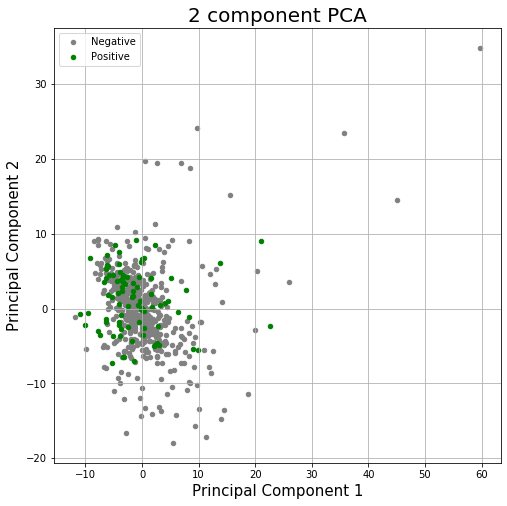

In [22]:
values_db = db_blood.drop(columns=['Patient age quantile', 'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'SARS-Cov-2 exam result'])

blood_x = StandardScaler().fit_transform(values_db.values)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(blood_x)

print(pd.DataFrame(pca.components_,columns=values_db.columns,index = ['PC-1','PC-2']))

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, db_blood[['SARS-Cov-2 exam result']]], axis = 1)

# print(finalDf)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['negative', 'positive']
colors = ['grey', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['SARS-Cov-2 exam result'] == target
#     print(finalDf.loc[indicesToKeep, 'principal component 1'])
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 20)
ax.legend(['Negative', 'Positive'])
ax.grid()

      Urine - Esterase  Urine - Aspect  Urine - pH  Urine - Hemoglobin  \
PC-1      0.000000e+00        0.417598    0.468983            0.372794   
PC-2      1.387779e-16        0.380604   -0.325789           -0.305835   

      Urine - Bile pigments  Urine - Ketone Bodies  Urine - Nitrite  \
PC-1           1.694066e-21                    0.0     0.000000e+00   
PC-2           0.000000e+00                    0.0    -5.293956e-23   

      Urine - Density  Urine - Urobilinogen  Urine - Protein  \
PC-1         0.163896                   0.0              0.0   
PC-2         0.577504                   0.0              0.0   

      Urine - Leukocytes  Urine - Crystals  Urine - Red blood cells  \
PC-1            0.294787          0.301948                 0.091094   
PC-2           -0.023028          0.500141                -0.119942   

      Urine - Hyaline cylinders  Urine - Granular cylinders  Urine - Yeasts  \
PC-1                        0.0                         0.0             0.0  

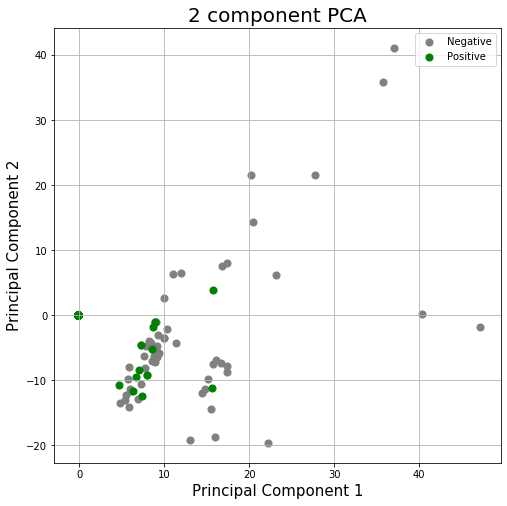

In [23]:
db_urine = dataset[categories["urine"]].replace([np.nan, 'NaN', 'absent', 'not_done', 'Ausentes', 'clear', '<1000', 'Não Realizado', 'normal'], 0)
db_urine = db_urine.replace(['cloudy', 'altered_coloring', 'present', 'Oxalato de Cálcio +++', 'orange', 'Urato Amorfo +++'], 1)
db_urine = db_urine.replace(['lightly_cloudy', 'Urato Amorfo --+', 'light_yellow'], 0.5)
db_urine = db_urine.replace(['Oxalato de Cálcio -++', 'yellow', 'citrus_yellow'], 0.7)

values_db = db_urine.drop(columns=['Patient age quantile', 'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'SARS-Cov-2 exam result'])

urine_x = StandardScaler().fit_transform(values_db.values)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(urine_x)

print(pd.DataFrame(pca.components_,columns=values_db.columns,index = ['PC-1','PC-2']))

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, db_urine[['SARS-Cov-2 exam result']]], axis = 1)

# print(finalDf)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['negative', 'positive']
colors = ['grey', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['SARS-Cov-2 exam result'] == target
#     print(finalDf.loc[indicesToKeep, 'principal component 1'])
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['Negative', 'Positive'])
ax.grid()

      Potassium    Sodium  Alkaline phosphatase  Ionized calcium   Magnesium  \
PC-1  -0.008191 -0.183016              0.022591         -0.649219   0.268541   
PC-2  -0.096709  0.000501              0.247674          0.371890   0.583737   

      Vitamin B12  Ferritin  Phosphor  
PC-1     0.152491  0.657478 -0.129603  
PC-2    -0.167588  0.274205  0.589049  


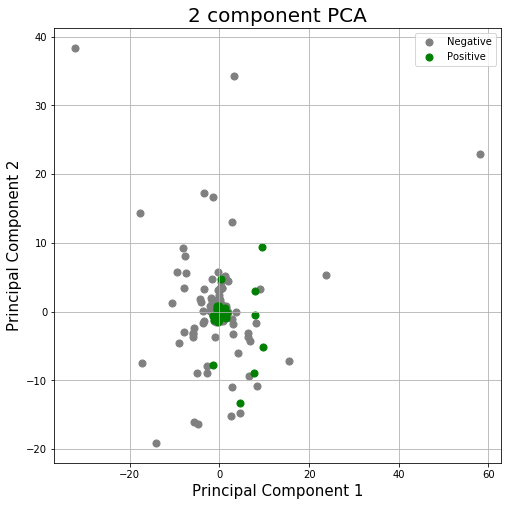

In [24]:
db_mineravit = dataset[categories["mineravit"]].replace([np.nan, 'NaN', 'absent', 'not_done', 'Ausentes', 'clear', '<1000', 'Não Realizado', 'normal'], 0)
db_mineravit = db_mineravit.replace(['cloudy', 'altered_coloring', 'present', 'Oxalato de Cálcio +++', 'orange', 'Urato Amorfo +++'], 1)
db_mineravit = db_mineravit.replace(['lightly_cloudy', 'Urato Amorfo --+', 'light_yellow'], 0.5)
db_mineravit = db_mineravit.replace(['Oxalato de Cálcio -++', 'yellow', 'citrus_yellow'], 0.7)

values_db = db_mineravit.drop(columns=['Patient age quantile', 'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'SARS-Cov-2 exam result'])

mineravit_x = StandardScaler().fit_transform(values_db.values)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(mineravit_x)

print(pd.DataFrame(pca.components_,columns=values_db.columns,index = ['PC-1','PC-2']))

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, db_mineravit[['SARS-Cov-2 exam result']]], axis = 1)

# print(finalDf)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['negative', 'positive']
colors = ['grey', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['SARS-Cov-2 exam result'] == target
#     print(finalDf.loc[indicesToKeep, 'principal component 1'])
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['Negative', 'Positive'])
ax.grid()

      pCO2 (venous blood gas analysis)  \
PC-1                          0.397660   
PC-2                         -0.083696   

      Hb saturation (venous blood gas analysis)  \
PC-1                                  -0.284350   
PC-2                                   0.107708   

      Base excess (venous blood gas analysis)  \
PC-1                                 0.403971   
PC-2                                -0.040718   

      pO2 (venous blood gas analysis)  Fio2 (venous blood gas analysis)  \
PC-1                        -0.298325                      8.673617e-19   
PC-2                         0.105252                     -0.000000e+00   

      Total CO2 (venous blood gas analysis)  pH (venous blood gas analysis)  \
PC-1                               0.482014                       -0.067351   
PC-2                              -0.070745                        0.047529   

      HCO3 (venous blood gas analysis)  Hb saturation (arterial blood gases)  \
PC-1                       

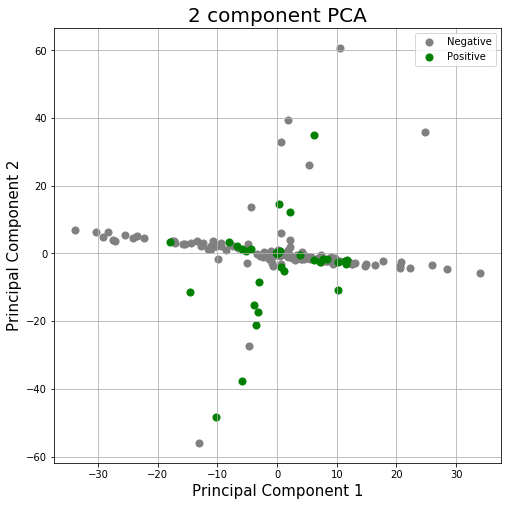

In [25]:
db_gas_analysis = dataset[categories["gas_analysis"]].replace([np.nan, 'NaN', 'absent', 'not_done', 'Ausentes', 'clear', '<1000', 'Não Realizado', 'normal'], 0)
db_gas_analysis = db_gas_analysis.replace(['cloudy', 'altered_coloring', 'present', 'Oxalato de Cálcio +++', 'orange', 'Urato Amorfo +++'], 1)
db_gas_analysis = db_gas_analysis.replace(['lightly_cloudy', 'Urato Amorfo --+', 'light_yellow'], 0.5)
db_gas_analysis = db_gas_analysis.replace(['Oxalato de Cálcio -++', 'yellow', 'citrus_yellow'], 0.7)

values_db = db_gas_analysis.drop(columns=['Patient age quantile', 'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'SARS-Cov-2 exam result'])

gas_analysis_x = StandardScaler().fit_transform(values_db.values)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(gas_analysis_x)

print(pd.DataFrame(pca.components_,columns=values_db.columns,index = ['PC-1','PC-2']))

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, db_gas_analysis[['SARS-Cov-2 exam result']]], axis = 1)

# print(finalDf)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['negative', 'positive']
colors = ['grey', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['SARS-Cov-2 exam result'] == target
#     print(finalDf.loc[indicesToKeep, 'principal component 1'])
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['Negative', 'Positive'])
ax.grid()

      Promyelocytes  Metamyelocytes  Myelocytes  Myeloblasts
PC-1       0.382415        0.664166    0.642373          0.0
PC-2       0.918580       -0.198147   -0.341977          0.0


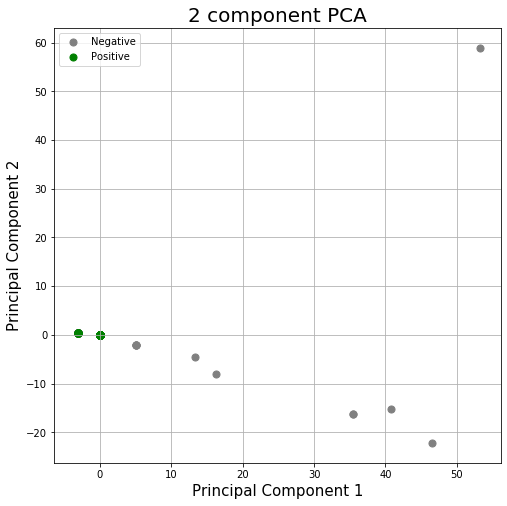

In [26]:
db_cancer = dataset[categories["cancer"]].replace([np.nan, 'NaN', 'absent', 'not_done', 'Ausentes', 'clear', '<1000', 'Não Realizado', 'normal'], 0)
db_cancer = db_cancer.replace(['cloudy', 'altered_coloring', 'present', 'Oxalato de Cálcio +++', 'orange', 'Urato Amorfo +++'], 1)
db_cancer = db_cancer.replace(['lightly_cloudy', 'Urato Amorfo --+', 'light_yellow'], 0.5)
db_cancer = db_cancer.replace(['Oxalato de Cálcio -++', 'yellow', 'citrus_yellow'], 0.7)

values_db = db_cancer.drop(columns=['Patient age quantile', 'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'SARS-Cov-2 exam result'])

cancer_x = StandardScaler().fit_transform(values_db.values)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(cancer_x)

print(pd.DataFrame(pca.components_,columns=values_db.columns,index = ['PC-1','PC-2']))

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, db_cancer[['SARS-Cov-2 exam result']]], axis = 1)

# print(finalDf)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['negative', 'positive']
colors = ['grey', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['SARS-Cov-2 exam result'] == target
#     print(finalDf.loc[indicesToKeep, 'principal component 1'])
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['Negative', 'Positive'])
ax.grid()

In [27]:
# HEATMAPS

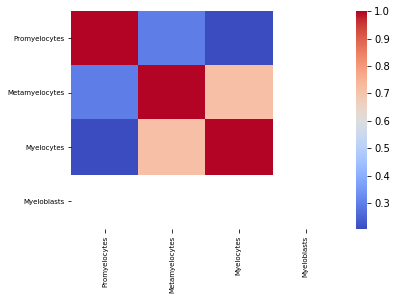

In [28]:
s=sns.heatmap(values_db.corr(),cmap='coolwarm') 
s.set_yticklabels(s.get_yticklabels(),rotation=0,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=90,fontsize=7)
plt.show()

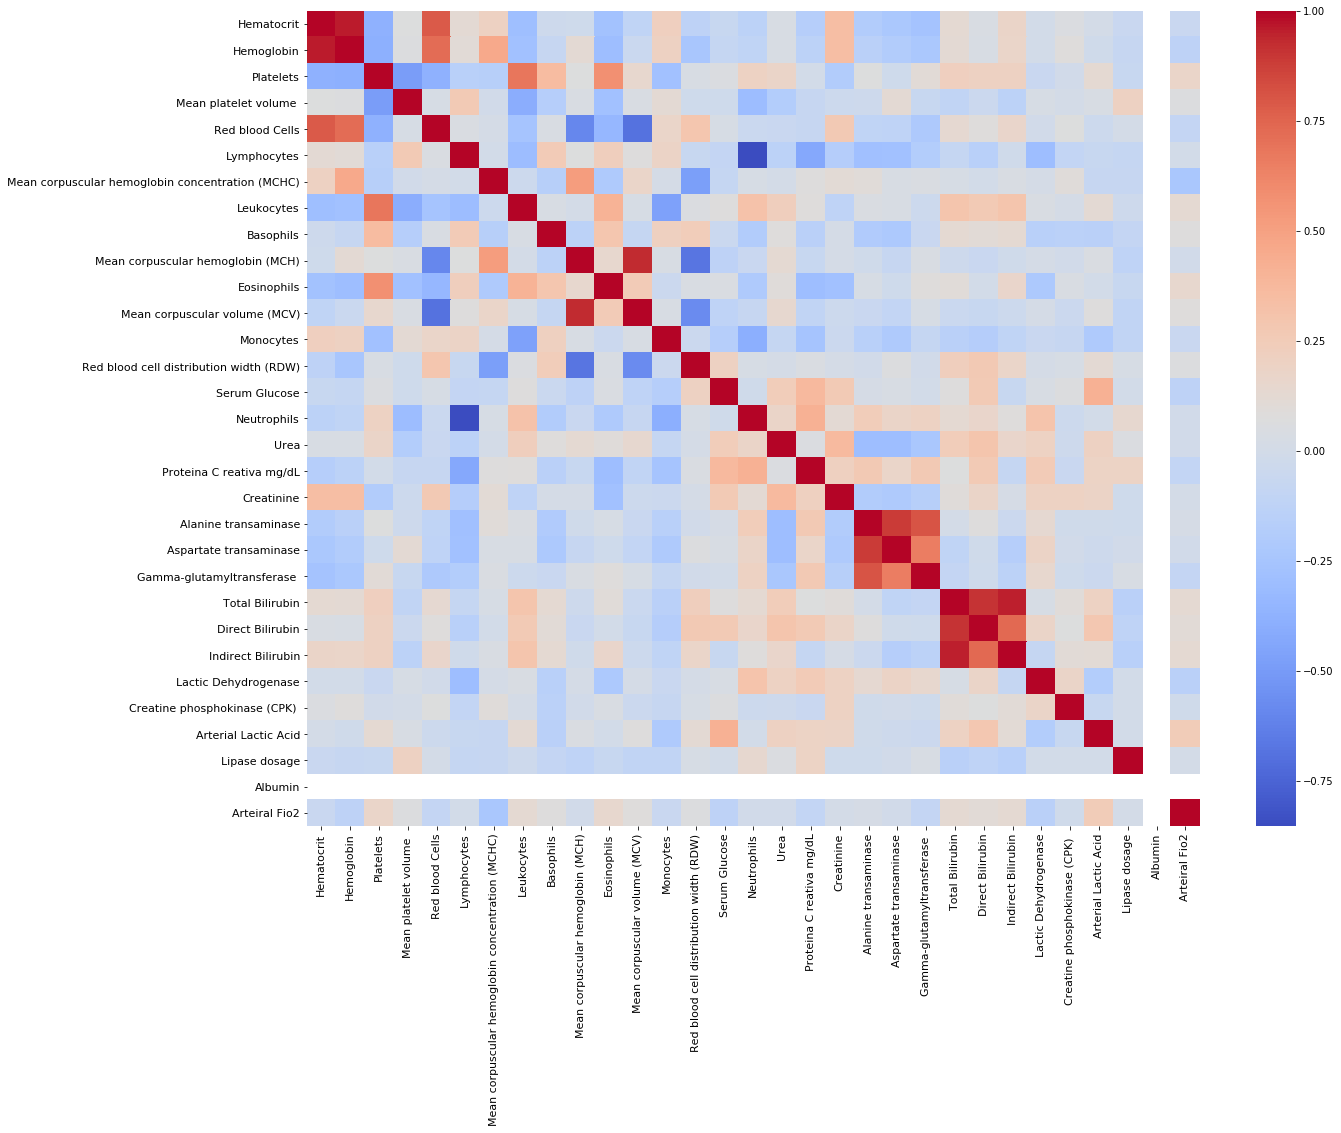

In [29]:
values_db = db_blood.drop(columns=['Patient age quantile', 'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)'])
values_db = values_db[values_db['SARS-Cov-2 exam result'] == "positive"]
plt.subplots(figsize=(20,15))
s=sns.heatmap(values_db.corr(),cmap='coolwarm') 
s.set_yticklabels(s.get_yticklabels(),rotation=0,fontsize=11)
s.set_xticklabels(s.get_xticklabels(),rotation=90,fontsize=11)
plt.show()

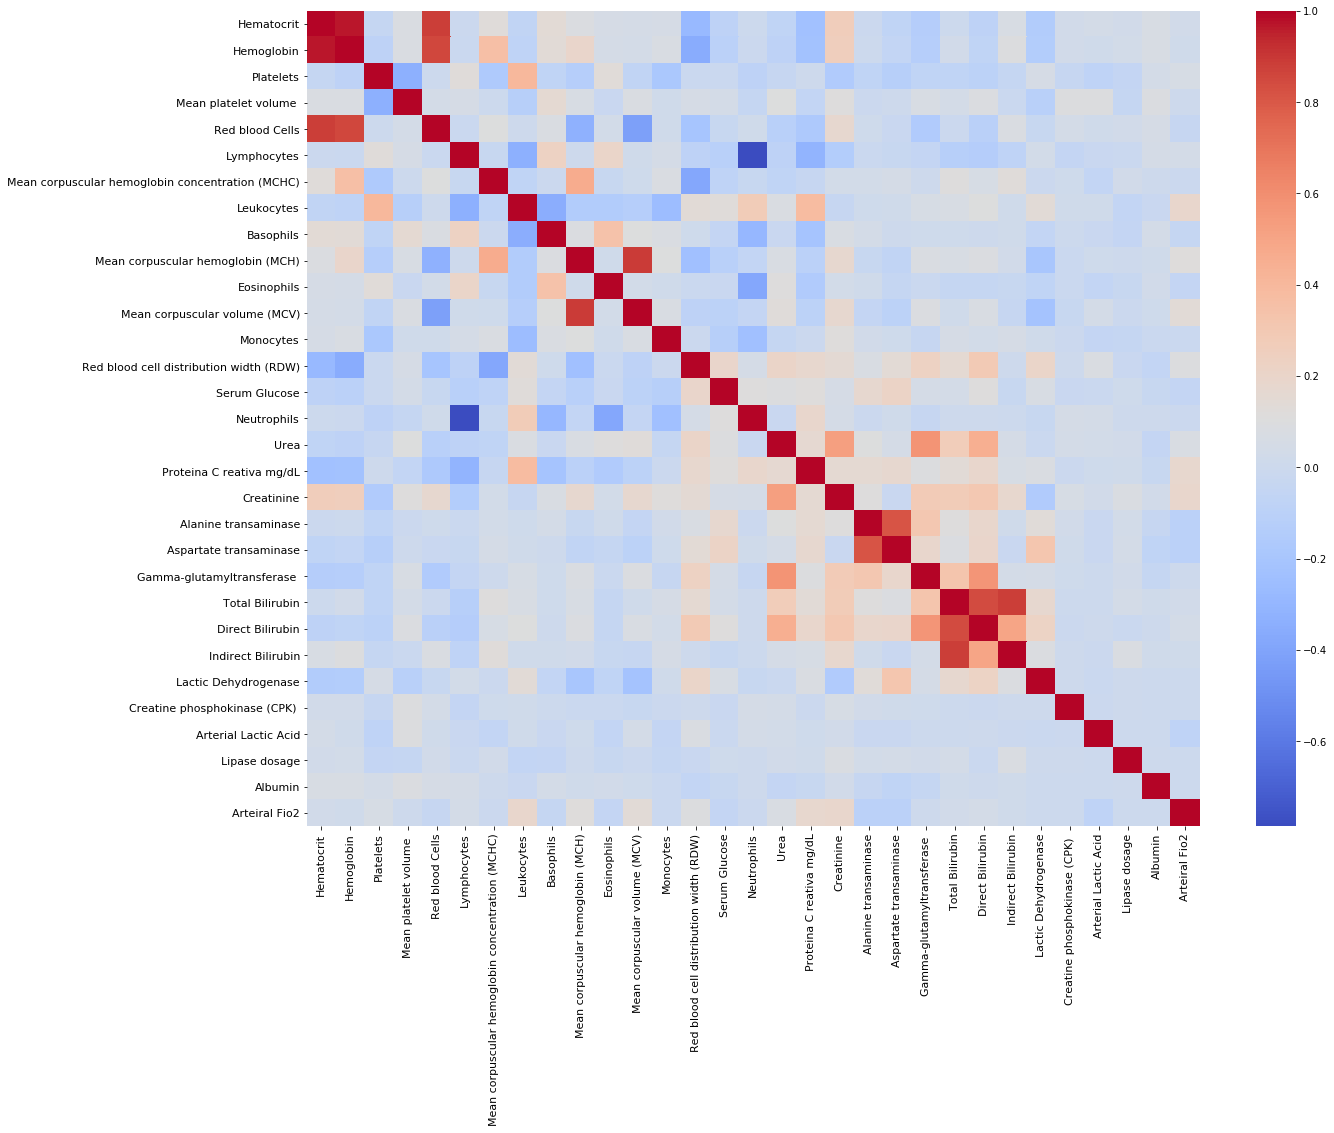

In [30]:
values_db = db_blood.drop(columns=['Patient age quantile', 'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)'])
values_db = values_db[values_db['SARS-Cov-2 exam result'] == "negative"]
# print(values_db.corr())
plt.subplots(figsize=(20,15))
s=sns.heatmap(values_db.corr(),cmap='coolwarm') 
s.set_yticklabels(s.get_yticklabels(),rotation=0,fontsize=11)
s.set_xticklabels(s.get_xticklabels(),rotation=90,fontsize=11)
plt.show()